In [1]:
from src.acid import *
from src.utils import *
import matplotlib
import matplotlib.pyplot as plt


Instructions for updating:
non-resource variables are not supported in the long term


Using TensorFlow backend.


In [2]:
image_directory = ('./images/moon.tif')
models_directory = '/mnt/d/other_data/model_02.h5'


### sliding window size. For a 512x512 global image, a 256 sliding window will split 
    # it into 4 256x256 images. Slicing and merging is done behind the scences and  
    # does not affect user experience. 
window_size = 256


### model_inference_grid instead of model_inference. All parameters remain the same. 
### In this example only one model is used. If more models are selected, every model 
#     is applied to every windowed slice. This is numerically intensive. 

Objects_Master_list = model_inference_grid(image_directory,models_directory,which_models='all',\
                                            window_size = window_size,\
                                            NORMALIZE=1,CONV_GS=1,INVERSE=0, EQUALIZE=1, CLAHE=1,\
                                            RESIZE=1,LIMITS=[0,512,0,512])


### A single Objects_Master_list is returned for the entire global image
objects_unique = get_unique_iou(Objects_Master_list,iou_thres=0.5,detection_thres=0.5)

objects_unique_readable = readable_output(objects_unique)

objects_unique_readable__ = objects_unique_readable[(objects_unique_readable['detection_thres'] > 0.) &\
                                                    (objects_unique_readable['ellipticity'] < 3.0) & \
                                                    (objects_unique_readable['object_size_pixels'] < 0.01*(512**2))]


--------------------------------------------------        
                                                  
       db         ,ad8888ba,   88  88888888ba,    
      d88b       d8a.    `a8b  88  88      `a8b   
     d8.`8b     d8.            88  88        `8b  
    d8.  `8b    88             88  88         88  
   d8YaaaaY8b   88             88  88         88  
  d8aaaaaaaa8b  Y8,            88  88         8P  
 d8.        `8b  Y8a.    .a8P  88  88      .a8P   
d8.          `8b  `aY8888Ya.   88  88888888Ya.    

--------------------------------------------------                                                         
                    
Loading weights from  /mnt/d/other_data/model_02.h5
Loading weights from  /mnt/d/other_data/model_02.h5
Loading weights from  /mnt/d/other_data/model_02.h5
Loading weights from  /mnt/d/other_data/model_02.h5


/mnt/c/Users/mad/Desktop/acid/src/acid.py:374: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(Craters_Master_list)


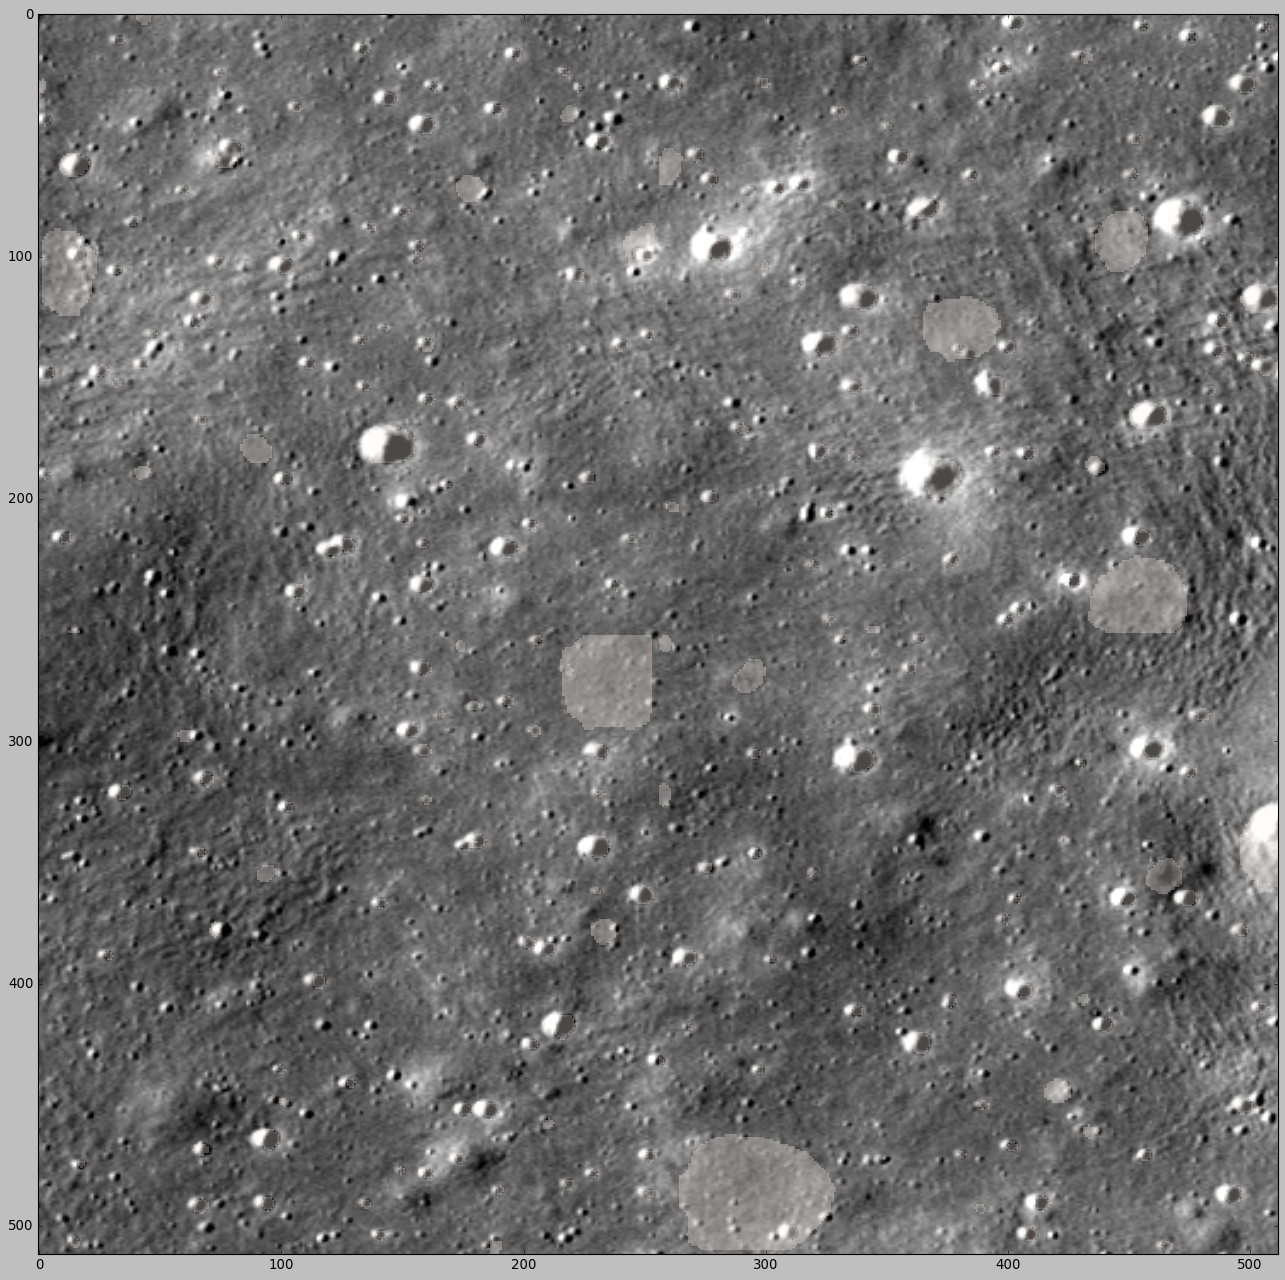

In [6]:

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 20.)
plt.style.use('classic')
matplotlib.style='classic'
ax = fig.gca()

a = plt.imread(image_directory)
plt.imshow(a,cmap='gray')

for mask in objects_unique_readable__['mask']:
    plt.imshow(np.ma.masked_where(mask == 0, mask),alpha=0.3)
plt.show()